 # MNIST HandWritten **Alphabets** Recognition

## Unzipping the File

In [ ]:
# unzipping the file
! unzip '/content/drive/MyDrive/mnist.zip' -d '/content/sample_data'

## Importing Necessary Libraries

In [ ]:
#importing necessary Librabries

import os
from os import listdir
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
from PIL import Image

In [ ]:
#Reading the folder
for i in range(65,91):
  size=len(os.listdir("/content/sample_data/New folder/"+chr(i)))
#checking the size of the each folder
  print(chr(i),":",size)

A : 13870
B : 8668
C : 23409
D : 10134
E : 11440
F : 1163
G : 5762
H : 7218
I : 1120
J : 8493
K : 5603
L : 11586
M : 12336
N : 19010
O : 57825
P : 19341
Q : 5812
R : 11566
S : 48419
T : 22495
U : 29008
V : 4182
W : 10784
X : 6272
Y : 10859
Z : 6076


In [ ]:
#creating the list of images and their labels
dir="/content/sample_data/New folder"
image=[]
label=[]

for item in os.listdir(dir):
  folder_dir=os.path.join(dir,item)
  for i in os.listdir(folder_dir):
    img=Image.open(os.path.join(folder_dir,i))
    image.append(img)
    label.append(i[0])

In [ ]:
#checking the file name
print(image[0].filename)
#checking the size of the file
print(image[0].size)
#checking the format of the file
print(image[0].format)
#checking the mode of the file
print(image[0].mode)

/content/sample_data/New folder/A/A-13416.png
(28, 28)
PNG
L


In [ ]:
#Resizing the images
img_rs=[]
for i in image:
  i.thumbnail((20,20))
  img_rs.append(i)

In [ ]:
#converting the pixels into array
pixel=[]
for i in img_rs:
  pixel.append(np.array(i).ravel())

In [ ]:
#Creating the DataFrame
df=pd.DataFrame(pixel)
df["Label"]=label
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Q
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Q
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Q
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Q


In [ ]:
#saving the Dataframe into .CSV file
df.to_csv("/content/drive/MyDrive/MNIST/Mnist_df",index=False)

In [ ]:
mnist_df=pd.read_csv("/content/drive/MyDrive/MNIST/Mnist_df")

In [ ]:
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 401 entries, 0 to Label
dtypes: int64(400), object(1)
memory usage: 1.1+ GB


In [ ]:
mnist_df.shape

(372451, 401)

In [ ]:
count=list(mnist_df.Label.value_counts())

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

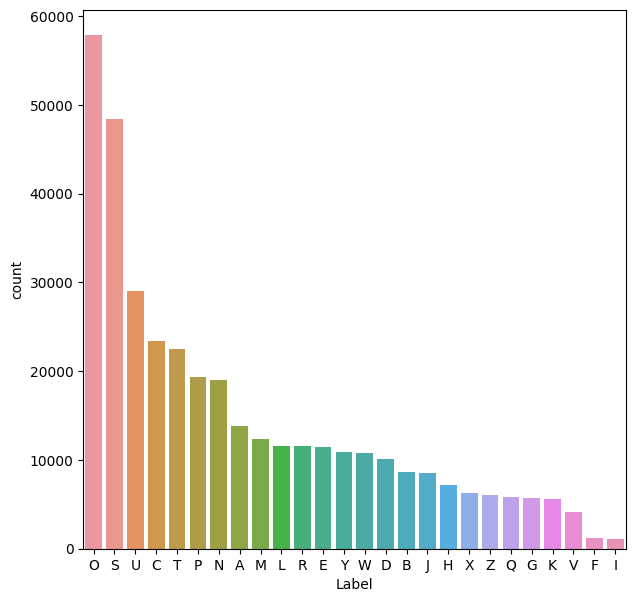

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x=mnist_df.Label, order=mnist_df.Label.value_counts(ascending=False).index)

#sns.countplot(x=mnist_df.Label.sort_values("mnist.Label.value_counts",ascending=True))

In [ ]:
#Defining the x(input) and y(output)
X=mnist_df.drop("Label",axis=1)
Y=mnist_df["Label"]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y

0         A
1         A
2         A
3         A
4         A
         ..
372446    Q
372447    Q
372448    Q
372449    Q
372450    Q
Name: Label, Length: 372451, dtype: object

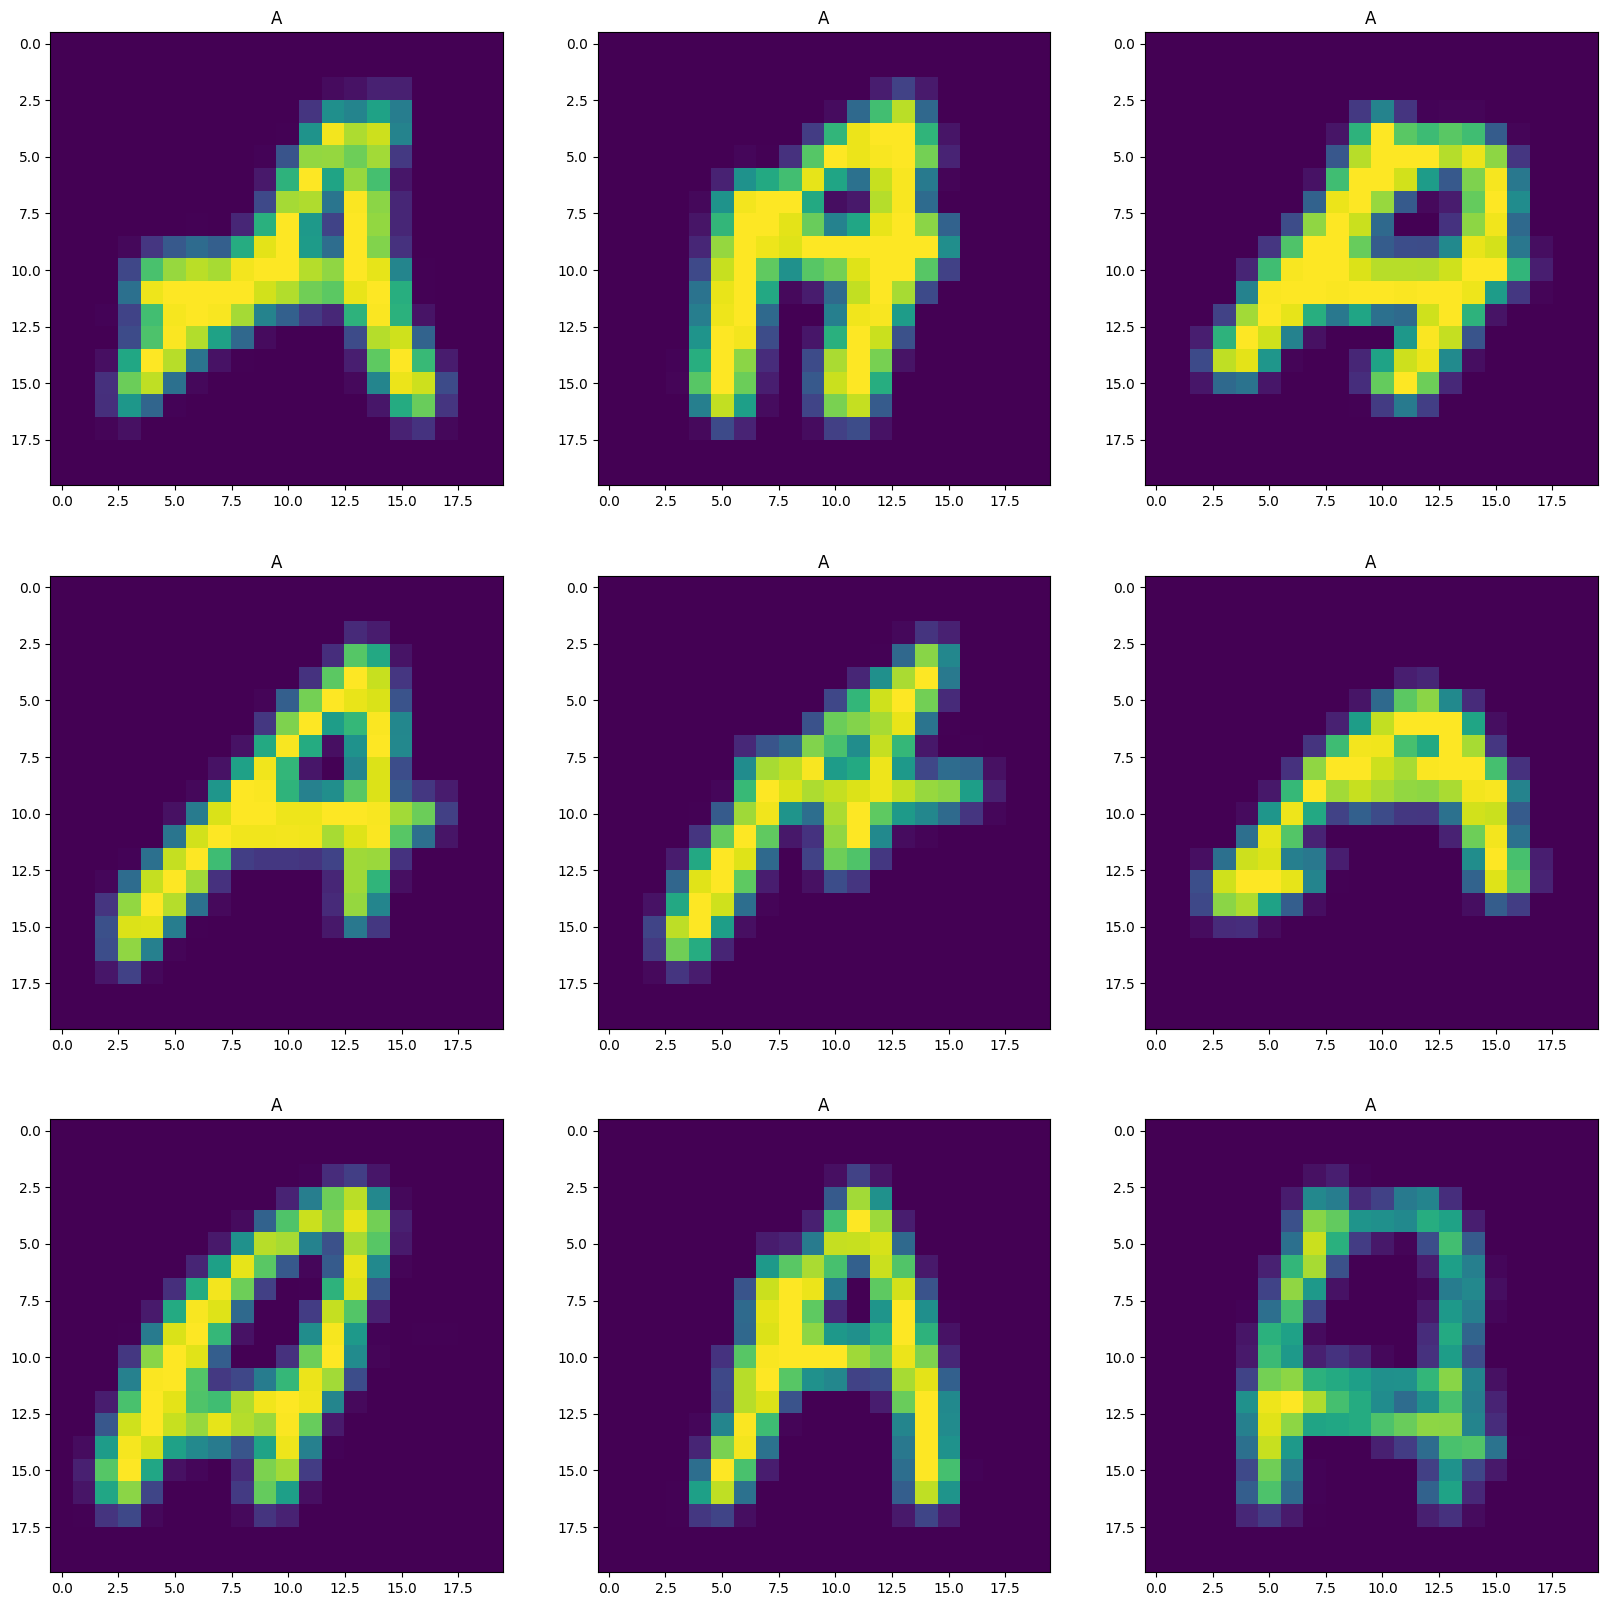

In [ ]:
#plotting the Random images from the data set
plt.figure(figsize=(20,20))
val=np.random.randint(0,1900,9)

for i in range(len(val)):
  plt.subplot(3,3,i+1)
  plt.title(Y[val[i]])
  img=np.reshape(X.values[val[i]],(20,20))
  plt.imshow(img)

In [ ]:
#splitting train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y, train_size=0.70,random_state=120)

# Checking the shape of the Train and Test Data
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(260715, 400) (111736, 400)
(260715,) (111736,)


In [ ]:
print(x_train.dtypes)
print(x_test.dtypes)
print(y_train.dtypes)
print(y_test.dtypes)

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
395    int64
396    int64
397    int64
398    int64
399    int64
Length: 400, dtype: object
0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
395    int64
396    int64
397    int64
398    int64
399    int64
Length: 400, dtype: object
object
object


## Model Building

## Logistic Regression

In [ ]:
#Performing the Logistic classification task
from sklearn.linear_model import LogisticRegression
#Training the Model
classifier_log=LogisticRegression(max_iter=500)
classifier_log.fit(x_train,y_train)
#predicting the Model
y_pred=classifier_log.predict(x_test)

#Evaluating the Model
from sklearn import metrics

Lr_score=metrics.classification_report(y_test,y_pred)
print(Lr_score)


              precision    recall  f1-score   support

           A       0.86      0.89      0.87      4146
           B       0.85      0.79      0.82      2552
           C       0.91      0.92      0.91      6923
           D       0.84      0.81      0.83      3080
           E       0.85      0.82      0.83      3449
           F       0.91      0.85      0.88       339
           G       0.86      0.77      0.81      1750
           H       0.78      0.73      0.76      2167
           I       0.84      0.84      0.84       322
           J       0.89      0.86      0.87      2583
           K       0.81      0.81      0.81      1697
           L       0.96      0.96      0.96      3495
           M       0.94      0.94      0.94      3765
           N       0.83      0.83      0.83      5654
           O       0.93      0.96      0.94     17298
           P       0.94      0.95      0.94      5794
           Q       0.87      0.82      0.84      1706
           R       0.88    

In [ ]:
#print(y_pred.dtypes)
print(y_pred),
print(y_test)

['V' 'P' 'S' ... 'R' 'U' 'O']
304236    V
349073    P
79450     S
114392    T
295102    L
         ..
295314    L
240072    O
171720    E
236452    O
286324    O
Name: Label, Length: 111736, dtype: object


In [ ]:
lr_pre=metrics.f1_score(y_test,y_pred,pos_label="postive",average="micro")
print(lr_pre)

0.8997816281234338


### Decision Tree

In [ ]:
# Performing the Descision Tree classification task
from sklearn.tree import DecisionTreeClassifier
#Training the Model
classifier_dt=DecisionTreeClassifier()
classifier_dt.fit(x_train,y_train)
#predicting the Model
y_pred_dt=classifier_dt.predict(x_test)

#Evaluating the Model
from sklearn import metrics

dt_score=metrics.classification_report(y_test,y_pred_dt)

print(dt_score)


              precision    recall  f1-score   support

           A       0.93      0.93      0.93      4146
           B       0.90      0.89      0.89      2552
           C       0.97      0.97      0.97      6923
           D       0.89      0.91      0.90      3080
           E       0.91      0.92      0.92      3449
           F       0.84      0.78      0.81       339
           G       0.89      0.87      0.88      1750
           H       0.88      0.88      0.88      2167
           I       0.90      0.85      0.88       322
           J       0.93      0.93      0.93      2583
           K       0.89      0.90      0.89      1697
           L       0.97      0.97      0.97      3495
           M       0.94      0.89      0.92      3765
           N       0.94      0.94      0.94      5654
           O       0.97      0.97      0.97     17298
           P       0.97      0.97      0.97      5794
           Q       0.86      0.88      0.87      1706
           R       0.92    

### Random Forest

In [ ]:
# Performing the Random Forest Classification task
from sklearn.ensemble import RandomForestClassifier
#Training the Model
classifier_rf=RandomForestClassifier()
classifier_rf.fit(x_train,y_train)
#Predicting the Model
y_pred_rf=classifier_rf.predict(x_test)

#Evaluating the Model
from sklearn import metrics

rf_score=metrics.classification_report(y_test,y_pred_rf)
print(rf_score)

              precision    recall  f1-score   support

           A       0.97      0.99      0.98      4146
           B       0.98      0.96      0.97      2552
           C       0.99      0.99      0.99      6923
           D       0.98      0.96      0.97      3080
           E       0.99      0.97      0.98      3449
           F       0.98      0.90      0.94       339
           G       0.99      0.96      0.97      1750
           H       0.97      0.94      0.96      2167
           I       0.99      0.96      0.97       322
           J       0.99      0.98      0.98      2583
           K       0.98      0.96      0.97      1697
           L       0.99      0.99      0.99      3495
           M       0.99      0.97      0.98      3765
           N       0.97      0.98      0.98      5654
           O       0.98      1.00      0.99     17298
           P       0.99      0.99      0.99      5794
           Q       0.98      0.94      0.96      1706
           R       0.98    

### Ada Boosting

In [ ]:
#Performing the AdaBoost Classification task
from sklearn.ensemble import AdaBoostClassifier

#Training the Model
classifier_ad=AdaBoostClassifier()
classifier_ad.fit(x_train,y_train)

#Predicting the Model
y_pred_ad=classifier_ad.predict(x_test)

#Evaluating the Model
from sklearn import metrics

ac_score=metrics.classification_report(y_test,y_pred_ad)

print(ac_score)

              precision    recall  f1-score   support

           A       0.62      0.41      0.49      4146
           B       0.31      0.41      0.35      2552
           C       0.67      0.73      0.70      6923
           D       0.28      0.53      0.37      3080
           E       0.43      0.28      0.34      3449
           F       0.36      0.55      0.43       339
           G       0.49      0.16      0.25      1750
           H       0.30      0.04      0.07      2167
           I       0.33      0.61      0.43       322
           J       0.47      0.41      0.44      2583
           K       0.39      0.50      0.44      1697
           L       0.66      0.56      0.61      3495
           M       0.49      0.78      0.60      3765
           N       0.42      0.42      0.42      5654
           O       0.74      0.71      0.73     17298
           P       0.78      0.75      0.76      5794
           Q       0.23      0.42      0.30      1706
           R       0.42    

### Bagging

In [ ]:
#Performing the Bagging Classification task
from sklearn.ensemble import BaggingClassifier

#Training the Model
classifier_b=BaggingClassifier()
classifier_b.fit(x_train,y_train)

#predicting the Model
y_pred_bc=classifier_b.predict(x_test)

#Evaluating the Model
from sklearn import metrics

bg_score=metrics.classification_report(y_test,y_pred_bc)

print(bg_score)

              precision    recall  f1-score   support

           A       0.94      0.97      0.95      4146
           B       0.94      0.94      0.94      2552
           C       0.97      0.99      0.98      6923
           D       0.94      0.94      0.94      3080
           E       0.97      0.95      0.96      3449
           F       0.94      0.86      0.90       339
           G       0.95      0.92      0.94      1750
           H       0.93      0.93      0.93      2167
           I       0.95      0.91      0.93       322
           J       0.96      0.96      0.96      2583
           K       0.95      0.94      0.94      1697
           L       0.98      0.98      0.98      3495
           M       0.97      0.95      0.96      3765
           N       0.96      0.97      0.97      5654
           O       0.98      0.99      0.98     17298
           P       0.98      0.98      0.98      5794
           Q       0.96      0.91      0.93      1706
           R       0.96    

# Comparision of Models

In [ ]:
#calculating the F1-score
lr_f1=metrics.f1_score(y_test,y_pred,pos_label="positive",average="weighted")
rf_f1=metrics.f1_score(y_test,y_pred_rf,pos_label="positive",average="weighted")
dt_f1=metrics.f1_score(y_test,y_pred_dt,pos_label="positive",average="weighted")
ad_f1=metrics.f1_score(y_test,y_pred_ad,pos_label="positive",average="weighted")
bc_f1=metrics.f1_score(y_test,y_pred_bc,pos_label="positive",average="weighted")


results_df=pd.DataFrame({"Model":["LogisticRegression","Decision Tree","Random Forest","Adaboost","Bagging"],
                        "F1_score":[lr_f1*100,dt_f1*100,rf_f1*100,ad_f1*100,bc_f1*100]})
results_df

,Model,F1_score
0,LogisticRegression,89.927283
1,Decision Tree,94.779458
2,Random Forest,98.517769
3,Adaboost,57.065119
4,Bagging,97.105479


# Conclusion:
1. The results of the evaluation using F1 score as the metric show that RandomForestClassifier, Performing well compared to other models, with a score of 98.51%.

2. BaggingRegressor and DecisionTreeClassifier is the second-best performance, with a score of 97.11% and 94.77%

3. These results suggest that RandomForestClassifier, BaggingRegressor, DecisionTreeClassifier these three may be the most effective model for this particular task.

Although further evaluation and validation is necessary to confirm this conclusion.

RandomForestClassifier , DecisionTreeClassifier we can use these two models for the deployment due time, speed of the execution and accuracy score.

## saving the Model

In [ ]:
#saving the Best Model
import pickle
pickle.dump(classifier_rf,open(r"/content/drive/MyDrive/MNIST/final_model","wb"))